# Tutorial de `Matplotlib`: 1. `Pyplot`, el interfaz Básico tipo MATLAB 

Creado, traducido y adaptado a Python 3 por [Pedro González Rodelas](https://www.ugr.es/~prodelas/) a partir de un notebook incluido en el siguiente [Tutorial de Matplotlib de astroML](http://jakevdp.github.io/mpl_tutorial/index.html)

        Última revisión 09/04/2020

En este notebook, exploraremos el submódulo más básico de [`matplotlib`](https://matplotlib.org/api/index.html), [`pyplot`](https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot), que proporciona un interfaz muy simple y estático, que crea de manera automática las figuras ([`figure`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.figure.html) y ejes ([`axes`](https://matplotlib.org/1.5.1/api/axes_api.html)) necesarios para generar la correspondiente gráfica. Fundamentalmente introduciremos la orden [`plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html) junto con algunas de sus opciones más habituales

También discutiremos algunos detalles y pequeñas diferencias entre el antiguo [`interfaz de pylab `](https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm), que ofrece un entorno de gráficos muy parecido al de MATLAB, y el habitual de [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html#module-matplotlib.pyplot) (consultar [¿Cuál es la diferencia entre pylab y pyplot?](https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot) para ver en stackoverflow una pequeña discusión al respecto).

En posteriores notebooks de este tutorial, introduciremos también una [`interfaz mucho más avanzada orientada a objetos`](https://matplotlib.org/gallery/api/agg_oo_sgskip.html), que ofrece mucha más flexibilidad y que usaremos en el resto del tutorial.

## Arrancando IPython via Jupyter notebook

IPython posee un modo incorporado para trabajar por defecto con figuras de `matplotlib` de una manera transparente y fácil para el usuario.

1. Bastaría con escribir y ejecutar la siguiente orden en una terminal de comandos, ya sea de conda o bien una X-terminal en sistemas Unix o Mac OS:
   
        jupyter notebook
   

2. Después de arrancar una sesión de IPython (ahora integrado en un servidor genérico de jupyter notebook que también admite otros lenguajes aparte de Python); y una vez dentro de un notebook como este, conviene utilizar alguna de las siguientes opciones para trabajar con `matplotlib` 

- Usar el antiguo entorno `pylab`:

        import pylab
        %pylab inline  

- o bien importar directamente tanto NumPy como el submódulo Matplotlib.Pyplot con los pseudónimos habituales hoy en día:
 
        import numpy as np
        import matplotlib.pyplot as plt
        %matplotlib inline 
  
  Nótese que en ambos casos los correspondientes `comandos mágicos` 

      %pylab inline
      %matplotlib inline 
      
  tienen el mismo efecto, y es el de que las correspondientes figuras que se   vayan generando aparezcan en línea, incrustadas en el propio notebook, y no en una ventana emergente fuera del mismo.

  Otra cuestión que puede confundir a los no iniciados es el hecho de poder controlar si la sesión con `matplotlib` está ejecutándose en modo interactivo o no, cosa que podemos modificar mediante las órdenes `ion` e `iof`, respectivamente. Por defecto suele estar en modo interactivo, pero siempre nos podríamos asegurar sin más que preguntarle al sistema justo ante de empezar a hacer nada más, mediante la orden `isinteractive()`, como veremos más abajo. No obstante, la única diferencia entre ambos modos de trabajar es si los gráficos generados son actualizados y mostrados de manera automática, justo después de ser creados, o bien tenemos nosotros que indicarlo expresamente mediante ciertas órdenes concretas, como [`show()`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) o [`draw()`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.draw.html).

## Usando el entorno Pylab

In [1]:
# entorno básico y muy sencillo, que emula el habitual de MATLAB
import pylab
%pylab inline   
# para que todas las figuras aparezcan incrustadas en el propio notebook.

Populating the interactive namespace from numpy and matplotlib


C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
isinteractive()  # comprobamos que efectivamente estamos en modo interactivo

True

## Usando directamente el entorno `pyplot`

No obstante, salvo que se use para realizar gráficos muy simples adaptados directamente de proyectos realizados previamente con MATLAB, lo que ahora se recomienda desde la Python Foundation es el uso del submódulo `matplotlib.pyplot` haciendo uso también del módulo NumPy para construir los correspondientes arrays de abcisas y ordenadas para cada gráfico.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Se ha importado también el módulo ``numpy`` para poder manipular
# con cierta facilidad los arrays de abcisas y ordenadas que emplearemos
%matplotlib inline 
# para que todas las figuras aparezcan incrustadas en el propio notebook.

De esta manera, la única diferencia es que ahora estaríamos obligados a anteponer `np.` o bien `plt.` a cualquier orden o función que provenga de NumPy o PyPlot, respectivamente. Pero esta es la norma habitual hoy en día, que cada usuario de Python conozca de qué módulo o submódulo de Python proviene cada orden o procedimiento que usa, con el objeto de intentar evitar posibles confusiones o conflictos en códigos que usen bastantes módulos a la vez.

## Un primer `plot`: el interfaz de Pylab 

Ya estaríamos listos para nuestro primer `plot`.  El modo ``%pylab`` que acabamos de activar justo antes realiza ciertas acciones en nuestro espacio de nombres, cargando ambos módulos `matplotlib` y `numpy`, al mismo tiempo que fija ciertas opciones por defecto para los gráficos, que hacen que éstos se puedan generar de manera parecida a cómo se suele hacer con MATLAB.

Empezemos por ejemplo dibujando una simple sinusoide:

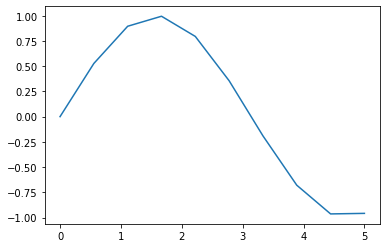

In [8]:
x = np.linspace(0, 5, 10)  # 100 valores equi-espaciados de 0 a 20
y = np.sin(x)

plt.plot(x, y);

In [9]:
x

array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ])

In [10]:
len(x)

10

In [11]:
y

array([ 0.        ,  0.52741539,  0.8961922 ,  0.99540796,  0.79522006,
        0.35584199, -0.19056796, -0.67965796, -0.96431712, -0.95892427])

### Personalizando los gráficos generados con `plot`:  Límites en los ejes

Probemos un poco con esta opción cambiando los límites usando ``xlim()`` y ``ylim()``

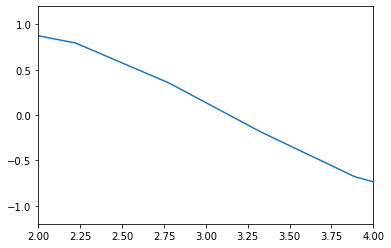

In [12]:
plot(x, y)
xlim(2, 4)
ylim(-1.2, 1.2);
# plt.show()

### Personalizando los gráficos generados con `plot`: Etiquetas y títulos de los ejes

Podemos etiquetar fácilmente los ejes y añadir un título:

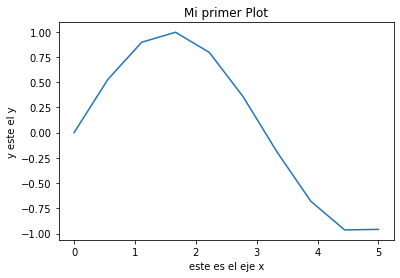

In [13]:
plot(x, y)

xlabel('este es el eje x')
ylabel('y este el y')
title('Mi primer Plot');

Nótese que las etiquetas también podrían ser mostradas usando símbolos de $\LaTeX$:

Text(0, 0.5, 'y este el y')

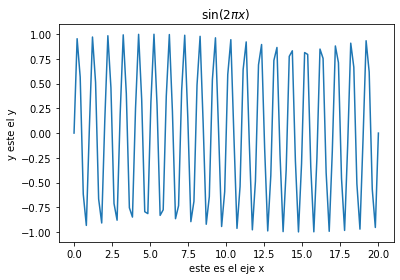

In [16]:
x = linspace(0,20,100)
y = sin(2 * pi * x)
plot(x, y)
title('$\sin(2 \pi x)$'); 
xlabel('este es el eje x')
ylabel('y este el y')

### Personalizando los gráficos generados con `plot`: Estilos de Líne

Fácilmente podríamos variar el color de la línea o el símbolo a emplear:

In [ ]:
plot(x, y, '-r')  # línea roja contínua ('r' viene del sistema RGB color)
xlim(0, 10)
ylim(-1.2, 1.2)

xlabel('este es el eje $x$')
ylabel('y este el $y$')
title('Mi primer Plot');

Otras opciones para el color serían:

     'r' = red (rojo)
     'g' = green (verde)
     'b' = blue (azul)
     'c' = cyan (cian)
     'm' = magenta (magenta)
     'y' = yellow (amarillo)
     'k' = black (negro)
     'w' = white (blanco)

Y alguna de las opciones para los estilos de línea:

     '-' = solid (contínua)
     '--' = dashed (discontínua)
     ':' = dotted (punteada)
     '-.' = dot-dashed (punteaday discontínua)
     '.' = points ()
     'o' = filled circles
     '^' = filled triangles

aunque existen muchas opciones más.

Para obtener más información, se puede consultar la documentación que acompaña a la función `plot`. En un notebook de IPython, esto puede hacerse usando el signo de interrogación ``?``:
 

In [17]:
plot?

Por supuesto que también podremos echar un vistazo a la versión online: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot

### Personalizando los gráficos generados con `plot`: Leyendas (`legend`)

Pueden mostrarse varios gráficos con la misma orden `plot`. En este caso, se puede emplear una cierta marca o leyenda (legend en inglés) para etiquetar cada una de las líneas:

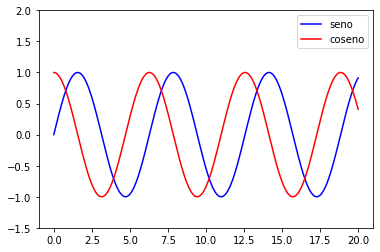

In [22]:
x = linspace(0, 20, 1000)
y1 = sin(x)
y2 = cos(x)

plot(x, y1, '-b', label='seno')
plot(x, y2, '-r', label='coseno')
#legend(loc='upper right')
legend(loc = 1)
ylim(-1.5, 2.0);

### Ejercicio: Estilos de Línea y  Personalización de los Plot

Justo más abajo tenemos los arrays ``x1, y1``, y ``x2, y2``.  Cree un `plot` donde ``x1`` e ``y1`` se representen con círculos azules, y ``x2`` junto con ``y2`` sean representados mediante una línea negra punteada. Etiqueta ambos gráficos como "muestras" y "modelo contínuo", y añade las correspondientes leyendas. Ajusta también los límites en $x$ e $y$ que mejor se adapten al gráfico en cuestión, según su criterio.

In [23]:
x1 = linspace(0, 10, 20)
y1 = sin(x1)

x2 = linspace(0, 10, 1000)
y2 = sin(x2)

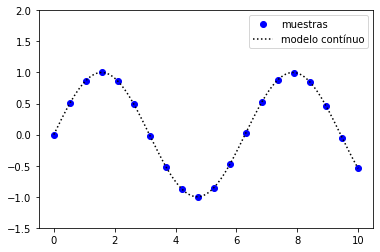

In [24]:
plot(x1, y1, 'bo', label='muestras')
plot(x2, y2, ':k', label='modelo contínuo')
legend()

ylim(-1.5, 2.0);